In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q torch torchvision
!pip install -q segmentation-models-pytorch albumentations
!apt-get update -qq && apt-get install -qq aria2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 5.7 MB/s eta 0:00:00
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

In [3]:
import os

# Change this to wherever you’d like in your Drive
DRIVE_DATA_DIR = "/content/drive/MyDrive/isic2018"

# Create folders if they don’t exist
os.makedirs(os.path.join(DRIVE_DATA_DIR, "images"), exist_ok=True)
os.makedirs(os.path.join(DRIVE_DATA_DIR, "masks"),  exist_ok=True)

In [4]:
from zipfile import ZipFile
from pathlib import Path
import subprocess

# URLs
IMG_URL  = "https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Training_Input.zip"
MSK_URL  = "https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1_Training_GroundTruth.zip"

# Paths on Drive
zip_img_drive = f"{DRIVE_DATA_DIR}/ISIC2018_Task1-2_Training_Input.zip"
zip_msk_drive = f"{DRIVE_DATA_DIR}/ISIC2018_Task1_Training_GroundTruth.zip"

# Download if missing
if not Path(zip_img_drive).exists():
    subprocess.run(["aria2c", "-x16", "-d", DRIVE_DATA_DIR, IMG_URL], check=True)
if not Path(zip_msk_drive).exists():
    subprocess.run(["aria2c", "-x16", "-d", DRIVE_DATA_DIR, MSK_URL], check=True)

# Unzip if folders empty
img_folder = Path(f"{DRIVE_DATA_DIR}/images")
if not any(img_folder.iterdir()):
    with ZipFile(zip_img_drive, 'r') as z: z.extractall(img_folder)
msk_folder = Path(f"{DRIVE_DATA_DIR}/masks")
if not any(msk_folder.iterdir()):
    with ZipFile(zip_msk_drive, 'r') as z: z.extractall(msk_folder)

In [5]:
!mkdir -p "/content/drive/MyDrive/Colab Notebooks"
!mv "/content/drive/MyDrive/isic2018" "/content/drive/MyDrive/Colab Notebooks/"


In [6]:
import os
import pandas as pd

# Base Drive folder
BASE = "/content/drive/MyDrive/Colab Notebooks/isic2018"

# Find the actual image & mask sub-folders automatically:
img_root = os.path.join(BASE, "images")
mask_root = os.path.join(BASE, "masks")

# There should be exactly one directory in each:
img_sub = next(d for d in os.listdir(img_root)  if os.path.isdir(os.path.join(img_root, d)))
msk_sub = next(d for d in os.listdir(mask_root) if os.path.isdir(os.path.join(mask_root, d)))

IMG_DIR = os.path.join(img_root,  img_sub)
MSK_DIR = os.path.join(mask_root, msk_sub)

print("Images in:", IMG_DIR)
print("Masks in: ", MSK_DIR)

# Now collect IDs
ids = [os.path.splitext(f)[0] for f in os.listdir(IMG_DIR) if f.lower().endswith(".jpg")]

# Build DataFrame
df = pd.DataFrame({
    "id":         ids,
    "image_path": [os.path.join(IMG_DIR, id + ".jpg")            for id in ids],
    "mask_path":  [os.path.join(MSK_DIR, id + "_segmentation.png") for id in ids]
})

# Quick existence sanity check
print("\nExistence check (first 5):")
for p in df.image_path[:5]:
    print(p, "→", os.path.exists(p))
for p in df.mask_path[:5]:
    print(p, "→", os.path.exists(p))

df.head()

Images in: /content/drive/MyDrive/Colab Notebooks/isic2018/images/ISIC2018_Task1-2_Training_Input
Masks in:  /content/drive/MyDrive/Colab Notebooks/isic2018/masks/ISIC2018_Task1_Training_GroundTruth

Existence check (first 5):
/content/drive/MyDrive/Colab Notebooks/isic2018/images/ISIC2018_Task1-2_Training_Input/ISIC_0000000.jpg → True
/content/drive/MyDrive/Colab Notebooks/isic2018/images/ISIC2018_Task1-2_Training_Input/ISIC_0000001.jpg → True
/content/drive/MyDrive/Colab Notebooks/isic2018/images/ISIC2018_Task1-2_Training_Input/ISIC_0000003.jpg → True
/content/drive/MyDrive/Colab Notebooks/isic2018/images/ISIC2018_Task1-2_Training_Input/ISIC_0000004.jpg → True
/content/drive/MyDrive/Colab Notebooks/isic2018/images/ISIC2018_Task1-2_Training_Input/ISIC_0000006.jpg → True
/content/drive/MyDrive/Colab Notebooks/isic2018/masks/ISIC2018_Task1_Training_GroundTruth/ISIC_0000000_segmentation.png → True
/content/drive/MyDrive/Colab Notebooks/isic2018/masks/ISIC2018_Task1_Training_GroundTruth/I

,id,image_path,mask_path
0,ISIC_0000000,/content/drive/MyDrive/Colab Notebooks/isic201...,/content/drive/MyDrive/Colab Notebooks/isic201...
1,ISIC_0000001,/content/drive/MyDrive/Colab Notebooks/isic201...,/content/drive/MyDrive/Colab Notebooks/isic201...
2,ISIC_0000003,/content/drive/MyDrive/Colab Notebooks/isic201...,/content/drive/MyDrive/Colab Notebooks/isic201...
3,ISIC_0000004,/content/drive/MyDrive/Colab Notebooks/isic201...,/content/drive/MyDrive/Colab Notebooks/isic201...
4,ISIC_0000006,/content/drive/MyDrive/Colab Notebooks/isic201...,/content/drive/MyDrive/Colab Notebooks/isic201...


In [7]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

print(f"Training samples:   {len(train_df)}")
print(f"Validation samples: {len(val_df)}")

Training samples:   2075
Validation samples: 519


In [8]:
import torch
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
from PIL import Image

# Define transforms
train_transforms = A.Compose([
    A.Resize(256, 256),
    A.HorizontalFlip(p=0.5),
    A.Normalize(),          # mean=0.0, std=1.0 by default
    ToTensorV2()
])
val_transforms = A.Compose([
    A.Resize(256, 256),
    A.Normalize(),
    ToTensorV2()
])

class SkinSegDataset(Dataset):
    def __init__(self, df, transforms):
        self.df = df.reset_index(drop=True)
        self.transforms = transforms

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        # Load image and mask
        img = np.array(Image.open(row.image_path).convert("RGB"))
        msk = np.array(Image.open(row.mask_path).convert("L")) // 255  # binary 0/1

        # Apply transforms
        augmented = self.transforms(image=img, mask=msk)
        image = augmented["image"]
        mask  = augmented["mask"].unsqueeze(0).float()  # add channel dim

        return image, mask

# Create datasets
train_ds = SkinSegDataset(train_df, train_transforms)
val_ds   = SkinSegDataset(val_df,   val_transforms)

# Create loaders
train_loader = DataLoader(train_ds, batch_size=8, shuffle=True,  num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=8, shuffle=False, num_workers=2, pin_memory=True)

# Sanity check a batch
images, masks = next(iter(train_loader))
print("Batch image shape:", images.shape)  # e.g. [8, 3, 256, 256]
print("Batch mask  shape:", masks.shape)   # e.g. [8, 1, 256, 256]

Batch image shape: torch.Size([8, 3, 256, 256])
Batch mask  shape: torch.Size([8, 1, 256, 256])


In [9]:
import torch
import segmentation_models_pytorch as smp

# Choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate U‑Net
model = smp.Unet(
    encoder_name="resnet34",        # choose encoder
    encoder_weights="imagenet",     # use ImageNet pretraining
    in_channels=3,                  # input RGB images
    classes=1,                      # output binary mask
)

model = model.to(device)
print(model)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [10]:
import torch.nn as nn
import torch

# Loss functions
bce_loss  = nn.BCEWithLogitsLoss()
dice_loss = smp.losses.DiceLoss(mode="binary")

def loss_fn(preds, targets):
    return bce_loss(preds, targets) + dice_loss(preds, targets)

# IoU metric
def iou_score(preds, targets, thresh=0.5):
    preds_bin = (torch.sigmoid(preds) > thresh).float()
    inter = (preds_bin * targets).sum(dim=(1,2,3))
    union = preds_bin.sum(dim=(1,2,3)) + targets.sum(dim=(1,2,3)) - inter
    return ((inter + 1e-6) / (union + 1e-6)).mean()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [11]:
from tqdm import tqdm
import torch
import os

best_iou = 0.0
num_epochs = 10

train_losses, val_losses, val_ious = [], [], []

for epoch in range(1, num_epochs+1):
    # ——— Training ———
    model.train()
    train_loss = 0.0
    for imgs, masks in tqdm(train_loader, desc=f"Epoch {epoch} [Train]"):
        imgs, masks = imgs.to(device), masks.to(device)
        optimizer.zero_grad()
        preds = model(imgs)
        loss = loss_fn(preds, masks)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)

    # ——— Validation ———
    model.eval()
    val_loss, val_iou = 0.0, 0.0
    with torch.no_grad():
        for imgs, masks in tqdm(val_loader, desc=f"Epoch {epoch} [Val]"):
            imgs, masks = imgs.to(device), masks.to(device)
            preds = model(imgs)
            val_loss += loss_fn(preds, masks).item()
            val_iou  += iou_score(preds, masks).item()
    val_loss /= len(val_loader)
    val_iou  /= len(val_loader)

    # Checkpoint best
    if val_iou > best_iou:
        best_iou = val_iou
        torch.save(model.state_dict(),
                   "/content/drive/MyDrive/Colab Notebooks/isic2018/best_unet.pth")

    # Log & record
    print(f"\nEpoch {epoch:02d} | "
          f"Train Loss: {train_loss:.4f} | "
          f"Val Loss:   {val_loss:.4f} | "
          f"Val IoU:    {val_iou:.4f} | "
          f"Best IoU:   {best_iou:.4f}\n")
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_ious.append(val_iou)

Epoch 1 [Val]: 100%|██████████| 65/65 [01:32<00:00,  1.42s/it]



Epoch 01 | Train Loss: 0.6265 | Val Loss:   0.4298 | Val IoU:    0.7123 | Best IoU:   0.7123



Epoch 2 [Val]: 100%|██████████| 65/65 [01:35<00:00,  1.47s/it]



Epoch 02 | Train Loss: 0.3589 | Val Loss:   0.3773 | Val IoU:    0.7212 | Best IoU:   0.7212



Epoch 3 [Val]: 100%|██████████| 65/65 [01:30<00:00,  1.40s/it]



Epoch 03 | Train Loss: 0.2784 | Val Loss:   0.3012 | Val IoU:    0.7885 | Best IoU:   0.7885



Epoch 4 [Val]: 100%|██████████| 65/65 [01:35<00:00,  1.46s/it]



Epoch 04 | Train Loss: 0.2429 | Val Loss:   0.2881 | Val IoU:    0.7933 | Best IoU:   0.7933



Epoch 5 [Val]: 100%|██████████| 65/65 [01:34<00:00,  1.46s/it]



Epoch 05 | Train Loss: 0.2053 | Val Loss:   0.2554 | Val IoU:    0.8096 | Best IoU:   0.8096



Epoch 6 [Val]: 100%|██████████| 65/65 [01:35<00:00,  1.47s/it]



Epoch 06 | Train Loss: 0.1867 | Val Loss:   0.2572 | Val IoU:    0.8125 | Best IoU:   0.8125



Epoch 7 [Val]: 100%|██████████| 65/65 [01:34<00:00,  1.46s/it]



Epoch 07 | Train Loss: 0.1815 | Val Loss:   0.2681 | Val IoU:    0.8125 | Best IoU:   0.8125



Epoch 8 [Val]: 100%|██████████| 65/65 [01:33<00:00,  1.43s/it]



Epoch 08 | Train Loss: 0.1864 | Val Loss:   0.2647 | Val IoU:    0.8124 | Best IoU:   0.8125



Epoch 9 [Val]: 100%|██████████| 65/65 [01:33<00:00,  1.43s/it]



Epoch 09 | Train Loss: 0.1620 | Val Loss:   0.2860 | Val IoU:    0.7973 | Best IoU:   0.8125



Epoch 10 [Val]: 100%|██████████| 65/65 [01:31<00:00,  1.42s/it]


Epoch 10 | Train Loss: 0.1747 | Val Loss:   0.2657 | Val IoU:    0.8069 | Best IoU:   0.8125



In [12]:
import matplotlib.pyplot as plt
import os

os.makedirs("outputs/curves", exist_ok=True)

# Loss curve
plt.figure(figsize=(6,4))
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs+1), val_losses,   label="Val Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
plt.title("Training & Validation Loss")
plt.savefig("outputs/curves/loss_curve.png", bbox_inches="tight")
plt.close()

# IoU curve
plt.figure(figsize=(6,4))
plt.plot(range(1, num_epochs+1), val_ious, label="Val IoU")
plt.xlabel("Epoch"); plt.ylabel("IoU"); plt.legend()
plt.title("Validation IoU Over Epochs")
plt.savefig("outputs/curves/iou_curve.png", bbox_inches="tight")
plt.close()

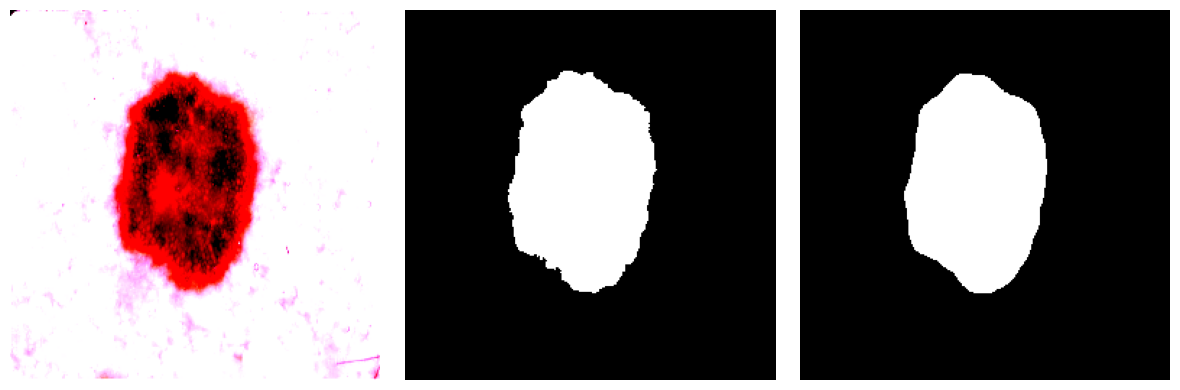

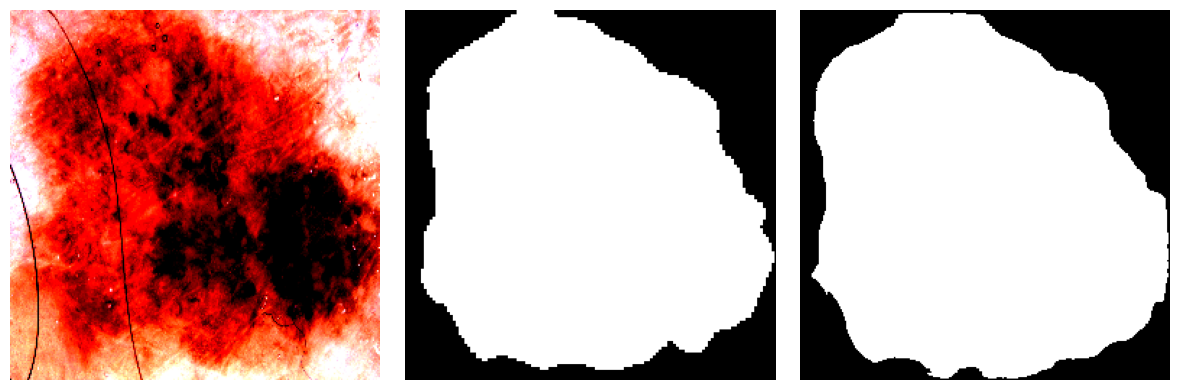

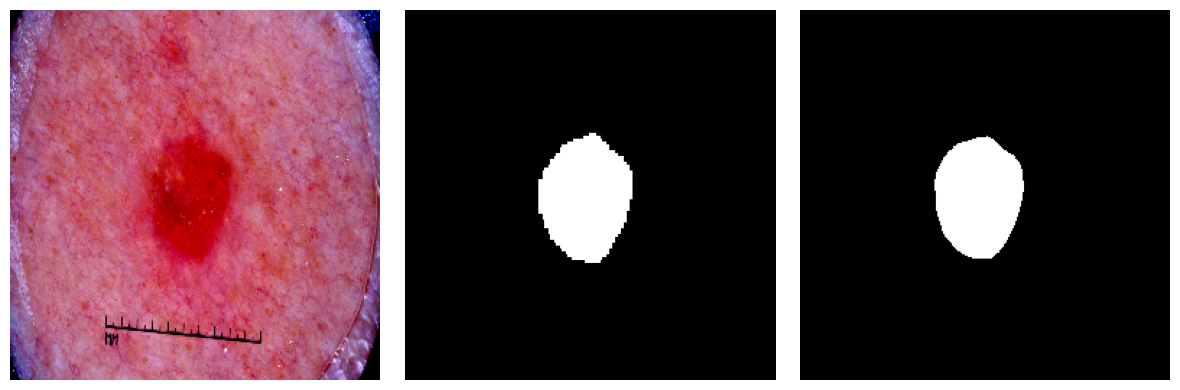

In [13]:
import numpy as np
from PIL import Image

# Load best model weights
model.load_state_dict(torch.load(
    "/content/drive/MyDrive/Colab Notebooks/isic2018/best_unet.pth",
    map_location=device
))
model.eval()

# Grab one batch
imgs, masks = next(iter(val_loader))
imgs, masks = imgs.to(device), masks.to(device)

with torch.no_grad():
    preds = torch.sigmoid(model(imgs)) > 0.5

os.makedirs("outputs/predictions", exist_ok=True)

# Save first 3 prediction triplets
for i in range(3):
    fig, axes = plt.subplots(1,3, figsize=(12,4))
    axes[0].imshow(imgs[i].cpu().permute(1,2,0));  axes[0].axis("off")
    axes[1].imshow(masks[i,0].cpu(), cmap="gray"); axes[1].axis("off")
    axes[2].imshow(preds[i,0].cpu(), cmap="gray"); axes[2].axis("off")
    plt.tight_layout()

    fname = f"outputs/predictions/sample_{i}.png"
    fig.savefig(fname, bbox_inches="tight")
    plt.close(fig)
    # (optional) display inline
    display(Image.open(fname))

In [14]:
os.makedirs("outputs/sample_pairs", exist_ok=True)

for idx in [0, 50, 100]:
    row = df.iloc[idx]
    img = np.array(Image.open(row.image_path).convert("RGB"))
    msk = np.array(Image.open(row.mask_path).convert("L"))

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
    ax1.imshow(img); ax1.set_title(f"Image [{row.id}]"); ax1.axis("off")
    ax2.imshow(msk, cmap="gray"); ax2.set_title(f"Mask  [{row.id}]"); ax2.axis("off")

    fname = f"outputs/sample_pairs/{row.id}.png"
    fig.savefig(fname, bbox_inches="tight")
    plt.close(fig)

In [15]:
!cp "/content/drive/MyDrive/Colab Notebooks/isic2018/best_unet.pth" /content/
from google.colab import files
files.download("best_unet.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>